In [6]:
install.packages("Rssa")
install.packages("imputeTS")

also installing the dependency ‘svd’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘stinepack’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
require("Rssa")
require("imputeTS")


Loading required package: Rssa
Loading required package: svd
Loading required package: forecast

The speed of the routines will be slower as well.

Attaching package: ‘Rssa’

The following object is masked from ‘package:stats’:

    decompose

Loading required package: imputeTS


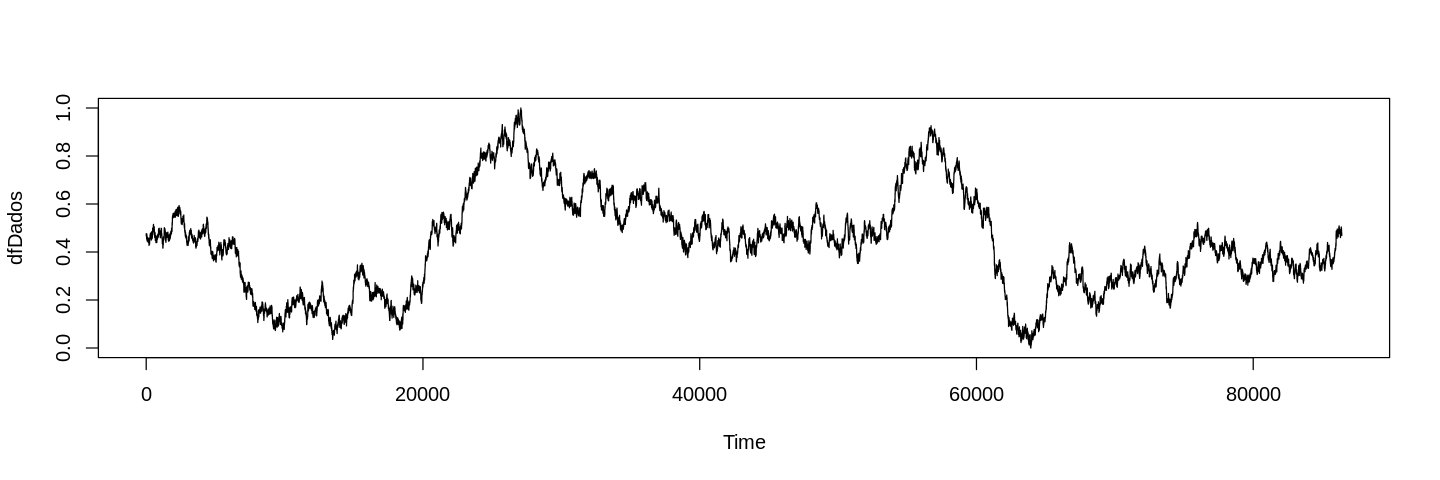

In [9]:
dfDados=readRDS("plumber/logNormalSerie.rds")
plot.ts(dfDados)

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

n=21600/2
	n=as.numeric(n)
	dadoDia=dfDados
    dadoDiaTemp=dadoDia
	set.seed(100)
	#gerador de indices aleatórios, N é a quantidade de lacunas aleatórias
	index<-sort(sample(c(11:(length(dadoDia) - 11)), n))
	dadoDiaTemp[index]=NA #cria espaços em branco
n=10
g=2
s=ssa(dadoDiaTemp, n)
dadoImputado=gapfill(s, groups=list(1:g))
length(dadoImputado)
plot.ts(dadoDiaTemp)
plot.ts(dadoImputado)
par(mfrow = c(3,1))

imputInter=na_interpolation(dadoDiaTemp)
imputMal=na_ma(dadoDiaTemp)

plot.ts(dadoDia[index])
lines(dadoImputado[index], col="red")
lines(imputInter[index], col="blue")
lines(imputMal[index], col="yellow")

rmse(dadoDia, dadoImputado)
rmse(dadoDia, imputInter)
rmse(dadoDia, imputMal)

ERROR: Error in ssa(dadoDiaTemp, n): could not find function "ssa"
